In [3]:
#!pip install tensorflow
#!pip install matplotlib
#!pip install scikit-learn
#!pip install tqdm

In [1]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
def train_and_verify(local_model, local_data, epochs, x_test, y_test, save_name):
    
    history = local_model.fit(local_data[0], local_data[1], epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

Epoch 1/5


2025-04-28 17:01:31.376018: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 2s 6ms/step - loss: 0.5539 - accuracy: 0.8317 - val_loss: 0.1874 - val_accuracy: 0.9358
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 0.1364 - accuracy: 0.9577 - val_loss: 0.0907 - val_accuracy: 0.9722
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0887 - accuracy: 0.9727 - val_loss: 0.0931 - val_accuracy: 0.9693
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0681 - accuracy: 0.9784 - val_loss: 0.0724 - val_accuracy: 0.9761
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
  

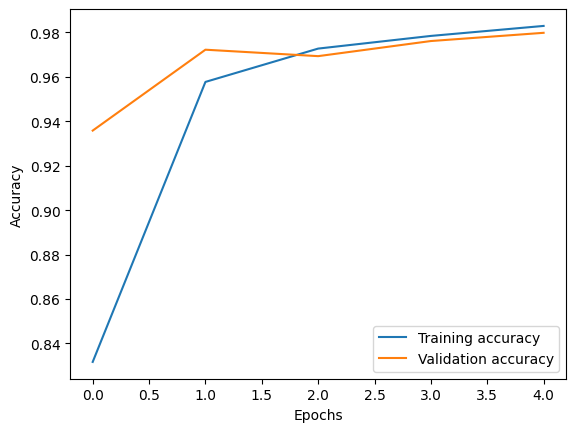

In [2]:
from TheModel import build
import tensorflow as tf

data = np.load('mnist_part_6.npz')
test = np.load('mnist_validation_data.npz')

local_model = build.build_it()
train_and_verify(local_model, [data['x'], data['y']], 5, test['x'], test['y'], "lmodel_2.keras")